# RESUMEN TEÓRICO: Control sintético

**Metodología--¿Qué estamos estimando?**

- Para cada unidad $j$ y tiempo $t$, sea $Y^N_{jt}$ el estado potencial de la variable de tratamiento en ausencia de tratamiento. Similarmente, para $j = 1$ y $t > T_0$, denote por $Y'_{1t}$ el estado potencial de la unidad 1 cuando es tratada.

- El efecto de interés es entonces
  $$ \tau_{1t} = Y'_{1t} - Y^N_{1t}; \quad t > T_0 $$

- Sabemos que para $j = 1$ y $t > T_0$ tenemos que $Y'_{1t} = Y_{1t}$, La gran pregunta entonces es **cómo encontramos una aproximación para** $Y^N_{1t}$.


### Estimación-Contrafactual

- Queremos aproximar la variable dependiente de la unidad tratada en ausencia de tratamiento usando las unidades no tratadas, a modo de crear una unidad $j = 1$ sintética. De ahí que, debemos escoger pesos $W = [w_2 \ldots w_{J+1}]^T$, de manera que el clon de $j = 1$ sea una combinación convexa de las unidades sin tratar usando esos pesos.

- Dado un vector de pesos $W = [w_2 \ldots w_{J+1}]^T$, podemos construir el resultado potencial sintético como
  $$ \hat{Y}^N_{1t} = \sum_{j=2}^{J+1} w_j Y_{j,t} $$

y, naturalmente, el efecto causal estimado como
  $$ \hat{\tau}_t = Y_{1,t} - \hat{Y}^N_{1t} $$


#### Estimación-¿Cómo elegimos los pesos de una manera óptima?

- El siguiente paso es elegir los pesos \( W \). Queremos elegir los pesos de manera que la unidad sintética replique de la mejor manera a la unidad tratada antes del tratamiento.

- Abadie, Diamond & Hainmuller (2010) proponen minimizar una norma pesada:
  $$ W^*(V) = \underset{w}{\operatorname{argmin}} \left\| X_1 - X_0 W \right\|_V = \sqrt{(X_1 - X_0 W)'V(X_1 - X_0 W)} $$
  donde \( V = [v_1, \ldots , v_k] \) son los pesos dados a cada característica predeterminada en la predicción.

- Los pesos \( V \) deben interpretarse como la relevancia de cada variable predictora en la definición del control sintético.


- Para cada elección de los pesos de la norma \( V \), podemos obtener unos pesos óptimos \( W^*(V) \). ¿Cómo elegimos \( V \)?

- Abadie & Gardeazabal (2003) sugirieron que la manera de dilucidar cuáles características deben recibir mayor peso son aquellas que mejor nos ayudan a reproducir la evolución de la unidad en el tiempo.

- Por ello, sugieren minimizar el error de predicción cuadrático medio (MSPE) en el período pre-tratamiento, esto es,
  $$ V^* = \underset{V}{\operatorname{argmin}} \sum_{t \in T_0} \left( Y_{1,t} - w_2(V) Y_{2t} - \ldots - w_{J+1}(V) Y_{J+1,t} \right)^2 $$
  donde \( T_0 \subseteq \{1, 2, \ldots , T_0\} \) es un conjunto de períodos previos al tratamiento. Idealmente no se deben tomar todos, para evaluar si la elección es confiable o no.


### Resumen

Para realizar la metodología de control sintético, Abadie (2021) sugiere lo siguiente

1. Dividir los períodos de pre-tratamiento en 2: uno de entrenamiento y uno de validación. Supongamos que $T_0$ es par, entonces podemos tomar los períodos $t = 1, \ldots, t_0 = \frac{T_0}{2}$ como validación y $t = t_0 + 1, \ldots, T_0$ como los de entrenamiento.

2. Para cada valor de $V$, encuentre los pesos $\hat{w}_2(V), \ldots, \hat{w}_{J+1}(V)$ usando los predictores.

3. Determine el valor $V^*$ que minimiza el MSPE para los períodos de entrenamiento.

4. Usando los pesos $\hat{w}_2(V^*), \ldots, \hat{w}_{J+1}(V^*)$, calcule el efecto del tratamiento $\hat{\tau}_1$.



### Supuestos de la metodología

Para que la metodología de control sintético recupere el efecto deseado necesitamos el cumplimiento de **cuatro supuestos**:

1. Sólamante la unidad tratada es afectada por la política (no spillovers).
2. La política no tiene efecto en los periodos previos al tratamiento (no efectos anticipatorios)
3. Se puede construir un control sintético a partir de las unidades de control. (Las características de la unidad tratada pueden construirse como combinación convexa de las características de las unidades no tratadas).
4. No hay mas eventos que puedan afectar la variable dependiente ocurriendo en el mismo periodo de tratamiento.


### Inferencia

Abadie et al. (2010) recomiendan los siguientes pasos para calcular los p-valores estandarizados:

1. Construir el control sintético para el tratamiento y para cada uno de los posibles controles del pool de donantes.
2. Para cada unidad \( j \) en \( \{1,2,\ldots,J+1\} \) construir el RMSPE pre y post tratamiento.
3. Para cada unidad \( j \) construir \( \text{Ratio}_j = \frac{\text{RMSPE}_{\text{post}, j}}{\text{RMSPE}_{\text{pre}, j}} \).
4. El p-valor es la probabilidad de que el efecto estimado del tratamiento sea resultado de algo aleatorio, entonces el estimador de frecuencias está definido por:
   $$ \text{P-valor} = \frac{\#\text{ de ratios mayores que }\text{Ratio}_{j=1,\text{Tratamiento}}}{\#\text{ de placebos}} $$


## Situación actual

Mostrar paper de embajada US y enviados por Caro para familiaración

Cosas para comentar:

1. Para este caso es mejor R que Python. Abadie et al (2003,2011,2014) diseñaron directamente el paquete. En Python el diseño es de Microsfot y está enfocado más a Data Science. R sigue sigue siendo más flexible que Stata a la hora de manipular la data.

2. La idea hoy es mostrar el código, resultados preliminares (posibles outputs para el paper) y discutir:
- 2.1 La inclusión de las covariables (ver Excel con FISLAC + Literatura). Por ejemplo, si tomamos las variables de la base de los indices tendriamos una muestra relativamente más corta, de 30 paises LAC a 12.
- 2.2 Inlucsión de qué paises como potenciales controles: ¿LAC? ¿EMDES? 
- 2.2 Preguntar que pasó exactamente en Perú 2010 para tener claro que efecto estamos obervando, para no combinar cosas.

CLAVE; ¿QUE PASÓ EN PERÚ? ¿QUE CONTROLES Y VARIABLES TENDREMOS EN CUENTA?

https://cran.r-project.org/web/packages/Synth/Synth.pdf

(...) p-value can be constructed by estimating in-space placebo effects for each unit in the sample and then calculating the fraction of such effects greater than or equal to the effect estimated for the treated unit

## Librerias

In [1]:
rm(list=ls())
library(foreign)
library(Synth)
library(xtable)

##
## Synth Package: Implements Synthetic Control Methods.

## See https://web.stanford.edu/~jhain/synthpage.html for additional information.




## Load data

In [100]:
# Load Data 
d <- read.dta("dbec3.dta")

In [101]:
d<-d[d$DATE<=2021,]

In [102]:
head(d[, 1:13])

index,COUNTRY_NAME,WEO_CODE,ISO3,LAC1,LAC2,DATE,DEBT_GDP,DEMOCRACY,EXP_GDP,REV_GDP,WGI_CONTR_CORR,WGI_GOV_EFFECT
0,United States of America (the),111,USA,0,0,2000,0.5075464,1,0.3189644,0.3463733,1.657759,1.802651
1,United States of America (the),111,USA,0,0,2001,0.5314625,1,0.3279394,0.3225718,1.790898,1.741426
2,United States of America (the),111,USA,0,0,2002,0.5553786,1,0.3369144,0.2987702,1.924038,1.680200
3,United States of America (the),111,USA,0,0,2003,0.5862454,1,0.3403072,0.2926646,1.755439,1.602976
4,United States of America (the),111,USA,0,0,2004,0.6609529,1,0.3371266,0.2947550,1.832575,1.761568
5,United States of America (the),111,USA,0,0,2005,0.6544269,1,0.3392119,0.3085292,1.545693,1.536153


## Run synthetic control

### Parameters

In [103]:
#  , , "WGI_GOV_IND", , , "WGI_ROL", "WGI_VOICE_ACCOUNT"

In [104]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2010 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean")),
                           list("WGI_CONTR_CORR", year_t0:year_t1, c("mean")),
                           list("WGI_GOV_EFFECT", year_t0:year_t1, c("mean")),
                           list("WGI_POL_STAB", year_t0:year_t1, c("mean")),
                           list("WGI_REG_QUAL", year_t0:year_t1, c("mean"))    ) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 293 #TRATADO --> PERÚ
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2

### Data preparation

In [105]:
dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )


### Fit

In [106]:
# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0001420059 

solution.v:
 0.2115556 0.1360484 0.1484672 0.1642642 0.007336014 0.1531062 0.1792223 

solution.w:
 1.573e-07 2.088e-07 1.119e-07 9.67e-08 1.072e-07 9.45e-08 1.662e-07 0.008093908 1.826e-07 1.745e-07 1.119e-07 9.87e-08 1.337e-07 1.427e-07 9.5e-08 1.044e-07 2.19e-07 9.01e-08 3.142e-07 1.889e-07 1.569e-07 1.815e-07 2.061e-07 1.507e-07 1.997e-07 2.134e-07 9.38e-08 1.529e-07 2.193e-07 6.839e-07 0.2629467 2.515e-07 2.555e-07 1.243e-07 3.788e-07 3.907e-07 2.09e-07 2.295e-07 3.202e-07 3.932e-07 7.005e-07 2.78e-07 1.419e-07 1.034e-07 1.857e-07 1.627e-07 1.07e-07 1.117e-07 2.901e-07 1.857e-07 1.148e-07 1.556e-07 2.182e-07 1.949e-07 1.921e-07 1.936e-07 8.57e-08 9.13635e-05 6.444e-07 1.955e-07 4.35e-08 4.13e-08 1.65e-08 2.082e-07 0.02479867 2.873e-07 1.439e-07 5.964e-07 1.862e-07 1.476e-07 1.858e

### Results

In [107]:
#### Table 1
synth.tables <- synth.tab(
                          dataprep.res = dataprep.out,
                          synth.res = synth.out
                          ); synth.tables

$tab.pred
                                 Treated Synthetic Sample Mean
DEBT_GDP                           0.381     0.380       0.559
EXP_GDP                            0.202     0.203       0.298
special.REV_GDP.2000.2010          0.200     0.199       0.283
special.WGI_CONTR_CORR.2000.2010  -0.263    -0.261      -0.016
special.WGI_GOV_EFFECT.2000.2010  -0.393    -0.090       0.006
special.WGI_POL_STAB.2000.2010    -0.980    -0.978      -0.031
special.WGI_REG_QUAL.2000.2010     0.244     0.226       0.005

$tab.v
                                 v.weights
DEBT_GDP                         0.212    
EXP_GDP                          0.136    
special.REV_GDP.2000.2010        0.148    
special.WGI_CONTR_CORR.2000.2010 0.164    
special.WGI_GOV_EFFECT.2000.2010 0.007    
special.WGI_POL_STAB.2000.2010   0.153    
special.WGI_REG_QUAL.2000.2010   0.179    

$tab.w
    w.weights unit.names unit.numbers
111     0.000        USA          111
112     0.000        GBR          112
122     0.000        AUT          122
124     0.000        BEL          124
128     0.000        DNK          128
132     0.000        FRA          132
134     0.000        DEU          134
136     0.008        ITA          136
137     0.000        LUX          137
138     0.000        NLD          138
142     0.000        NOR          142
144     0.000        SWE          144
146     0.000        CHE          146
156     0.000        CAN          156
158     0.000        JPN          158
172     0.000        FIN          172
174     0.000        GRC          174
176     0.000        ISL          176
178     0.000        IRL          178
181     0.000        MLT          181
182     0.000        PRT          182
184     0.000        ESP          184
186     0.000        TUR          186
193     0.000        AUS          193
196     0.000        NZL          196
199     0.000        ZAF          199
213     0.000        ARG          213
218     0.000        BOL          218
223     0.000        BRA          223
228     0.000        CHL          228
233     0.263        COL          233
238     0.000        CRI          238
243     0.000        DOM          243
248     0.000        ECU          248
253     0.000        SLV          253
258     0.000        GTM          258
263     0.000        HTI          263
268     0.000        HND          268
273     0.000        MEX          273
278     0.000        NIC          278
283     0.000        PAN          283
288     0.000        PRY          288
298     0.000        URY          298
299     0.000        VEN          299
311     0.000        ATG          311
313     0.000        BHS          313
314     0.000        ABW          314
316     0.000        BRB          316
321     0.000        DMA          321
328     0.000        GRD          328
336     0.000        GUY          336
339     0.000        BLZ          339
343     0.000        JAM          343
361     0.000        KNA          361
362     0.000        LCA          362
364     0.000        VCT          364
366     0.000        SUR          366
369     0.000        TTO          369
419     0.000        BHR          419
423     0.000        CYP          423
429     0.000        IRN          429
433     0.000        IRQ          433
436     0.000        ISR          436
439     0.000        JOR          439
443     0.025        KWT          443
449     0.000        OMN          449
453     0.000        QAT          453
456     0.000        SAU          456
466     0.000        ARE          466
469     0.000        EGY          469
474     0.000        YEM          474
513     0.000        BGD          513
514     0.000        BTN          514
516     0.000        BRN          516
518     0.000        MMR          518
522     0.000        KHM          522
524     0.000        LKA          524
528     0.000        TWN          528
532     0.162        HKG          532
534     0.000        IND          534
536     0.000        IDN          536
537     0.

J: considerar + años; + paises. Eso implica no usar directamente la data de los índices. Por ejemplo los placebos se hacen muchos años atrás.

### Resultados gráficos

#### Comparaciones

ERROR: Error in arrows(year_t1 - 2, Text.height, year_t1, Text.height, col = "black", : objeto 'Text.height' no encontrado


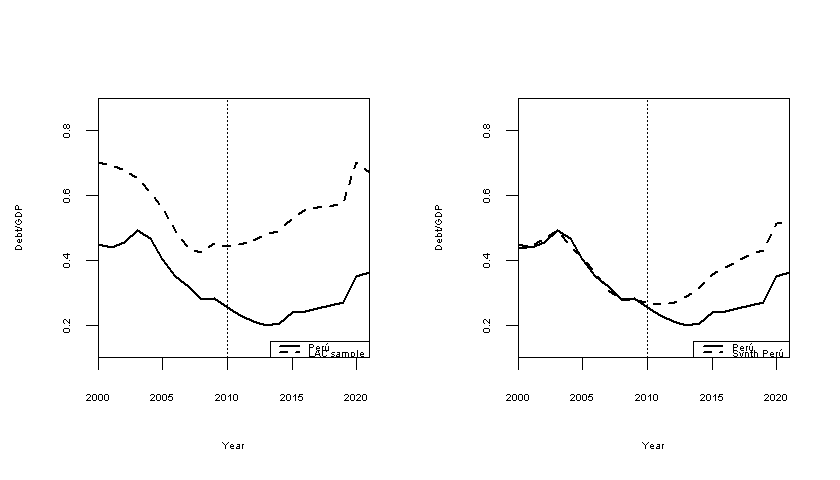

In [108]:
synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

# Primer gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# # Segundo gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","Synth Perú"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

# par(mfrow = c(1, 1))



#### Efecto

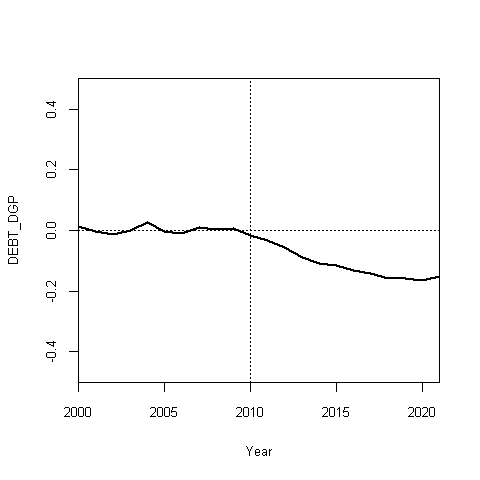

In [110]:
options(repr.plot.width = 4, repr.plot.height = 4)
cexl = 0.8
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)

gap <- dataprep.out$Y1-(dataprep.out$Y0%*%synth.out$solution.w)

plot(2000:2021,gap,
type="l",ylim=c(-0.5,0.5),col="black",lty="solid",
ylab ="DEBT_DGP",
     xlab ="Year",
     xaxs = "i", yaxs = "i",
     lwd=2)
     

abline(h=0,lty="dotted")
abline(v=2010,lty="dotted")
# text(2008,0.1,"Clause activation",cex=Cex.set)


### Placebo

Time placebo


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0005391217 

solution.v:
 0.9620055 0.03119304 0.00680141 

solution.w:
 0.003357004 0.003661269 0.002772725 0.002479044 0.002810626 0.002786707 0.00292008 0.002520971 0.003996129 0.003147174 0.002945212 0.002828758 0.003385205 0.002864314 0.002254013 0.002952266 0.002582842 0.002726953 0.003923161 0.003026441 0.0030275 0.003259314 0.003301898 0.004490798 0.003712672 0.004573781 0.00295419 0.003245404 0.003073766 0.0076635 0.004008687 0.004614168 0.005110398 0.003819143 0.004424915 0.001829249 0.360217 0.003512409 0.004327263 0.002962647 0.003634213 0.004444321 0.00338791 0.003717055 0.002805309 7.38826e-05 0.004084716 0.003228545 0.002948484 0.003322416 0.002973553 0.003781872 0.002833061 0.002574279 0.004168971 0.003720559 0.004765908 0.004501932 0.004474879 0.003208303 0.005512655 0.0003248457 0

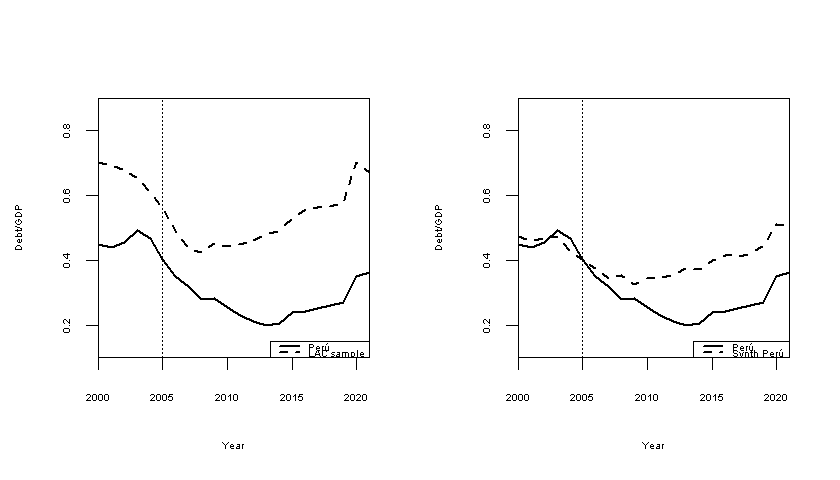

In [111]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2005 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean"))) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 293 #TRATADO --> PERÚ
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2


dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )

# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )


options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)

# Primer gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# Segundo gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Perú","Synth Perú"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

par(mfrow = c(1, 1))


Unit placebo


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 6.097161e-05 

solution.v:
 0.424557 0.5754131 2.98687e-05 

solution.w:
 0.003130609 0.01008865 0.3874057 0.4109118 0.01384047 0.01171424 0.007818783 0.02650507 0.01610831 0.006218888 0.01421129 0.01682903 0.003410643 0.006520117 0.006670954 0.007068631 0.006244567 0.01013698 0.004083067 0.004498666 0.006941122 0.002395547 0.01673016 0.0005166847 



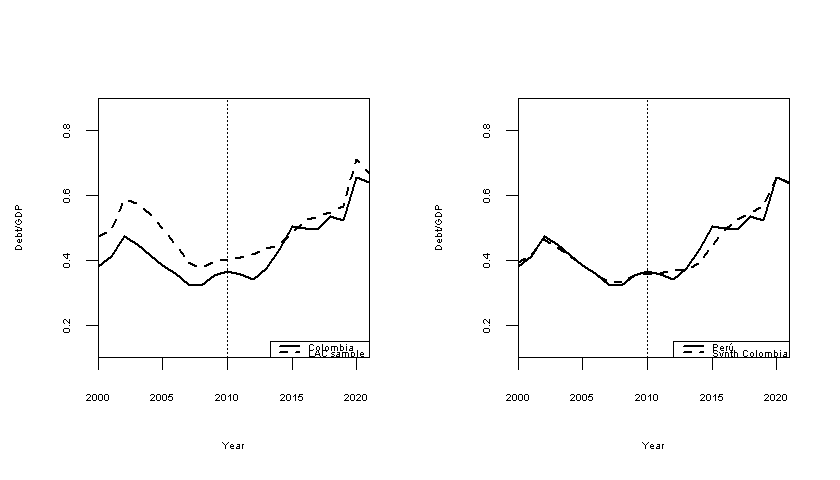

In [76]:
year_t0 = 2000 #AÑO AL INICIO
year_t1 = 2010 #AÑO ANTES DLE TRATAMIENTO
year_t2 = 2021

predictors_dp       = c("DEBT_GDP","EXP_GDP")
dependent_dp        = "DEBT_GDP"
id_variable         = which(names(d) == "WEO_CODE")
time_variable       = which(names(d) == "DATE")
special_predictors  = list(list("REV_GDP", year_t0:year_t1, c("mean"))) #OTROS PREDICTORES (EN LA MEDIA)
treated             = 233 #TRATADO --> colombia
controls            = setdiff(unique(d$WEO_CODE), treated) #EXLUYENDO AL TRATADO
time_predictors     = year_t0:year_t1
time_ssr            = year_t0:year_t1
names               = which(names(d) == "ISO3")
time_plot           = year_t0:year_t2


dataprep.out <-
  dataprep(
           foo = d,
           predictors    = predictors_dp,
           dependent     = dependent_dp,
           unit.variable = id_variable,
           time.variable = time_variable,
           special.predictors = special_predictors,
           treatment.identifier = treated,
           controls.identifier = controls,
           time.predictors.prior = time_predictors,
           time.optimize.ssr = time_ssr,
           unit.names.variable = names,
           time.plot = time_plot
         )

# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )


synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
options(repr.plot.width = 7, repr.plot.height = 4)
cexl = 0.5
par(cex = cexl)  #
par(cex.axis = cexl, cex.lab = cexl, cex.main = cexl, cex.sub = cexl)
par(mfrow = c(1, 2))

# Primer gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], col = "black", lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Colombia","LAC sample"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1-2, Text.height, col="black", length=.1)

# Segundo gráfico
plot(year_t0:year_t2, dataprep.out$Y1plot, type="l", ylim=c(0.1,0.9), col="black", lty="solid", ylab ="Debt/GDP", xlab ="Year", xaxs = "i", yaxs = "i", lwd=2)
lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)
abline(v=year_t1, lty="dotted")
legend(x="bottomright", legend=c("Colombia","Synth Colombia"), lty=c("solid","dashed"), col=c("black","black"), cex=cexl, bg="white", lwd=c(2,2))
# arrows(year_t1-2, Text.height, year_t1, Text.height, col="black", length=.1)

par(mfrow = c(1, 1))


Leave-one-out to construct p-values

In [112]:
lista_tratados = unique(d$WEO_CODE)

In [116]:
# Asumiendo que d es tu dataframe y ya está cargado

# Definir los años
year_t0 = 2000 # Año al inicio
year_t1 = 2010 # Año antes del tratamiento
year_t2 = 2021 # Año final

# Lista de tratados
lista_tratados = unique(d$WEO_CODE)
lista_tratados = lista_tratados[0:50]

# Preparar un dataframe para guardar los resultados
resultados = data.frame()

resultados_lista = list()

# Bucle para cada país o código en la lista de tratados
for (i in lista_tratados) {
    # Definir variables para dataprep
    predictors_dp = c("DEBT_GDP","EXP_GDP")
    dependent_dp = "DEBT_GDP"
    id_variable = which(names(d) == "WEO_CODE")
    time_variable = which(names(d) == "DATE")
    special_predictors = list(list("REV_GDP", year_t0:year_t1, c("mean")))
    treated = i
    controls = setdiff(unique(d$WEO_CODE), treated)
    time_predictors = year_t0:year_t1
    time_ssr = year_t0:year_t1
    names_variable = which(names(d) == "ISO3")
    time_plot = year_t0:year_t2

    # Ejecutar dataprep
    dataprep.out <- dataprep(
        foo = d,
        predictors = predictors_dp,
        dependent = dependent_dp,
        unit.variable = id_variable,
        time.variable = time_variable,
        special.predictors = special_predictors,
        treatment.identifier = treated,
        controls.identifier = controls,
        time.predictors.prior = time_predictors,
        time.optimize.ssr = time_ssr,
        unit.names.variable = names_variable,
        time.plot = time_plot
    )

    # Ejecutar synth
    synth.out <- synth(
        data.prep.obj = dataprep.out,
        Margin.ipop = .005,
        Sigf.ipop = 7,
        Bound.ipop = 6
    )

    gap <- dataprep.out$Y1-(dataprep.out$Y0%*%synth.out$solution.w)

    # Guardar los resultados
    # Crear un dataframe temporal

    nombre = as.character(i)

    temp_df <- data.frame(nombre = gap)
    
    resultados_lista[[nombre]] <- temp_df

}

# Ver los resultados
resultados <- do.call(cbind, resultados_lista)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0916442 

solution.v:
 0.2024639 0.7727225 0.0248136 

solution.w:
 0.005832874 0.006532851 0.006320946 0.006214608 0.006821687 0.006172574 0.006245174 0.005453512 0.005872759 0.004627309 0.006155209 0.004919673 0.005444894 0.005496988 0.005799815 0.006705578 0.006134997 0.005873649 0.006049635 0.006448514 0.00572599 0.00587636 0.005392625 0.00523043 0.004687145 0.004603928 0.005145138 0.005627207 0.004300822 0.004937529 0.004376082 0.004278517 0.004494597 0.004824509 0.004198998 0.003758354 0.004753975 0.004659301 0.004172944 0.004540514 0.003988386 0.00426392 0.004735828 0.005242654 0.005053395 0.004032266 0.004719166 0.005047961 0.005107133 0.005020853 0.004711748 0.004673413 0.005314836 0.005334693 0.004716824 0.004839455 0.004430913 0.004600831 0.004714334 0.005613383 0.004558795 0.0475749 0.0

In [119]:
pvalues = list() 
controles = setdiff(unique(names(resultados)), "X293")

for (i in controles) {

    r = as.numeric(resultados[["X293"]]<resultados[[i]])
    nombre = as.character(i)
    temp_df <- data.frame(nombre = r)  
    pvalues[[nombre]] <- temp_df

}

pvalues <- do.call(cbind, pvalues)
colnames(pvalues) <- controles
p_values_emp = 1 - (colSums(t(pvalues))/50)

Ratio RPMSE Post and Pre treatment

In [120]:
p_values_emp

[1] 0.78 0.76 0.74 0.80 0.84 0.72 0.44 0.50 0.22 0.20 0.12 0.12 0.08 0.06 0.06
[16] 0.08 0.08 0.08 0.10 0.08 0.10 0.14

In [ ]:
# Text.height <- 23000
# Cex.set <- .8
# plot(2000:2021,dataprep.out$Y1plot,
# type="l",ylim=c(0.1,0.9),col="black",lty="solid",
# ylab ="DEBT_DGP",
#      xlab ="Year",
#      xaxs = "i", yaxs = "i",
#      lwd=2)

# lines(2000:2021, aggregate(d["DEBT_GDP"], by = list(d$DATE), mean, na.rm = TRUE)[, 2], 
#       col = "black", lty = "dashed", lwd = 2)

# abline(v=year_t1,lty="dotted")

# legend(x="bottomright",
#        legend=c("Perú","Rest of the LAC sample")
#       ,lty=c("solid","dashed"),col=c("black","black")
#       ,cex=.8,bg="white",lwd=c(2,2))

# arrows(year_t1-2,Text.height,year_t1-2,Text.height,col="black",length=.1)


# synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
# plot(2000:2021,dataprep.out$Y1plot,
# type="l",ylim=c(0.1,0.9),col="black",lty="solid",
# ylab ="DEBT_DGP",
#      xlab ="Year",
#      xaxs = "i", yaxs = "i",
#      lwd=2)
     

# lines(year_t0:year_t2, synthY0, lty = "dashed", lwd = 2)

# abline(v=year_t1,lty="dotted")

# legend(x="bottomright",
#        legend=c("Actual Perú","Synth Perú")
#       ,lty=c("solid","dashed"),col=c("black","black")
#       ,cex=.8,bg="white",lwd=c(2,2))

# arrows(year_t1-2,Text.height,year_t1,Text.height,col="black",length=.1)
